In [1]:
# Importar las librerías necesarias
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Listar los archivos en el directorio de entrada de Kaggle
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


# Cargar el dataset
data = pd.read_csv('data/dataTrain_balanced_timestamp.csv')

# Limpiar el dataset si es necesario (por ejemplo, eliminando columnas innecesarias)
data.drop(columns=['Unnamed: 0.1'], inplace=True)

# Convertir la columna de timestamp a formato datetime si es necesario
data['time_stamp'] = pd.to_datetime(data['time_stamp'], format='%Y-%m-%d %H:%M:%S', errors='coerce')


# Definir variables predictoras (X) y la variable objetivo (y)
X = data.drop(columns=['label', 'time_stamp'])  # Eliminamos la columna 'label' y 'time_stamp'
y = data['label']

# Dividir el dataset en conjunto de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión logística
model = LogisticRegression(max_iter=100)
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

c:\Documentos\Semestre8\DataScience\Proyectos\Proyecto2DS\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [2]:

# Importar las librerías necesarias
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

# Listar los archivos en el directorio de entrada de Kaggle
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Cargar el dataset
data = pd.read_csv('data/dataTrain_balanced_timestamp.csv')

# Limpiar el dataset (eliminando columnas innecesarias y filas con NaN o inf)
data.drop(columns=['Unnamed: 0.1'], inplace=True)
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.dropna(inplace=True)

# Convertir la columna de timestamp a formato datetime si es necesario
data['time_stamp'] = pd.to_datetime(data['time_stamp'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

# Definir variables predictoras (X) y la variable objetivo (y)
X = data.drop(columns=['label', 'time_stamp'])  # Eliminamos la columna 'label' y 'time_stamp'
y = data['label']

# Escalado de los datos para la regresión logística
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir el dataset en conjunto de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión logística
model = LogisticRegression(max_iter=100)
model.fit(X_train, y_train)

# Mostrar las configuraciones del modelo
model_params = model.get_params()
print("Configuraciones del modelo:")
for param, value in model_params.items():
    print(f"{param}: {value}")

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Exactitud del modelo:", accuracy)
print("\nMatriz de confusión:\n", conf_matrix)
print("\nReporte de clasificación:\n", class_report)

Configuraciones del modelo:
C: 1.0
class_weight: None
dual: False
fit_intercept: True
intercept_scaling: 1
l1_ratio: None
max_iter: 100
multi_class: deprecated
n_jobs: None
penalty: l2
random_state: None
solver: lbfgs
tol: 0.0001
verbose: 0
warm_start: False
Exactitud del modelo: 0.6927443553374582

Matriz de confusión:
 [[1186692  127779   39412]
 [   1781  967377  383879]
 [   1811  692846  658586]]

Reporte de clasificación:
               precision    recall  f1-score   support

          -1       1.00      0.88      0.93   1353883
           0       0.54      0.71      0.62   1353037
           1       0.61      0.49      0.54   1353243

    accuracy                           0.69   4060163
   macro avg       0.72      0.69      0.70   4060163
weighted avg       0.72      0.69      0.70   4060163



In [3]:
import joblib

# Guardar el modelo entrenado en un archivo
joblib.dump(model, 'modelo_logistico.pkl')



['modelo_logistico.pkl']

In [4]:
# Cargar el modelo desde el archivo
model_cargado = joblib.load('modelo_logistico.pkl')


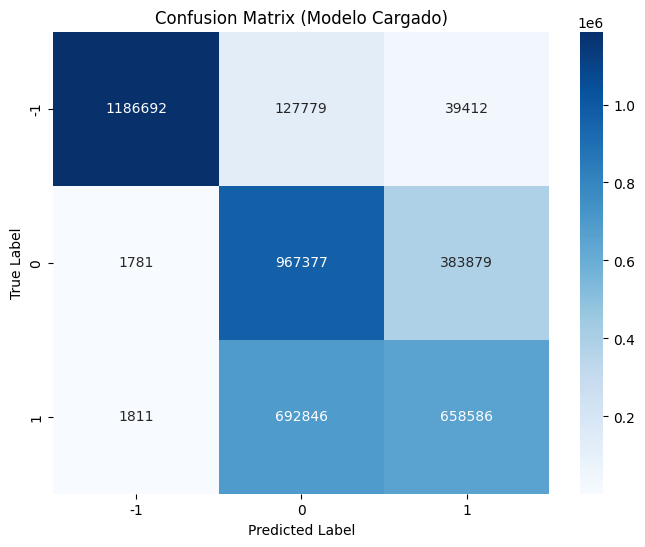

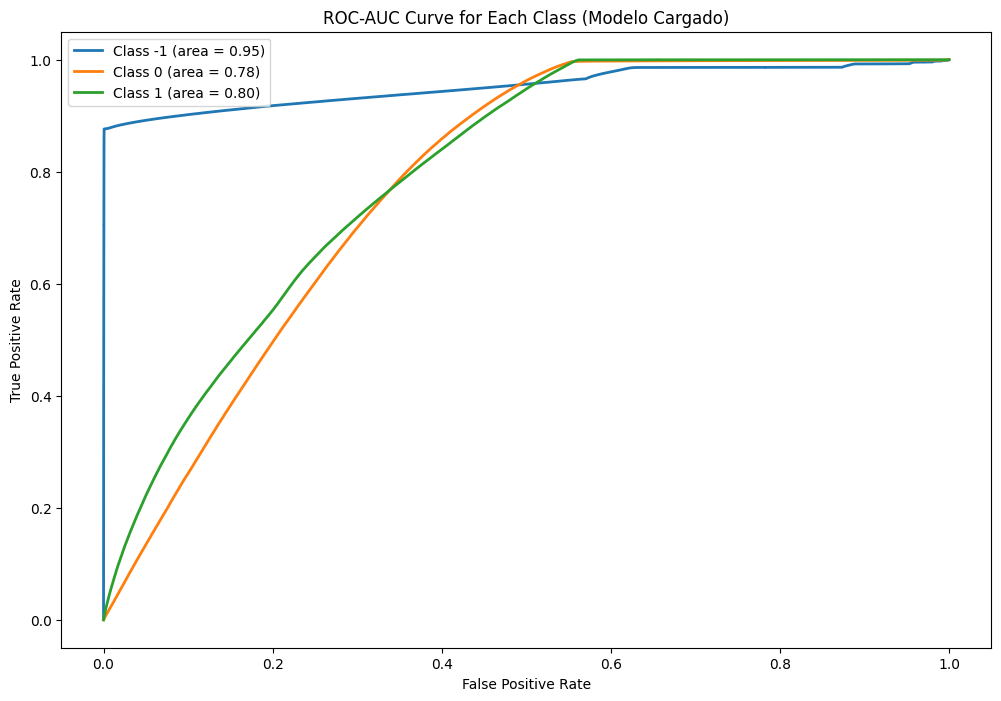

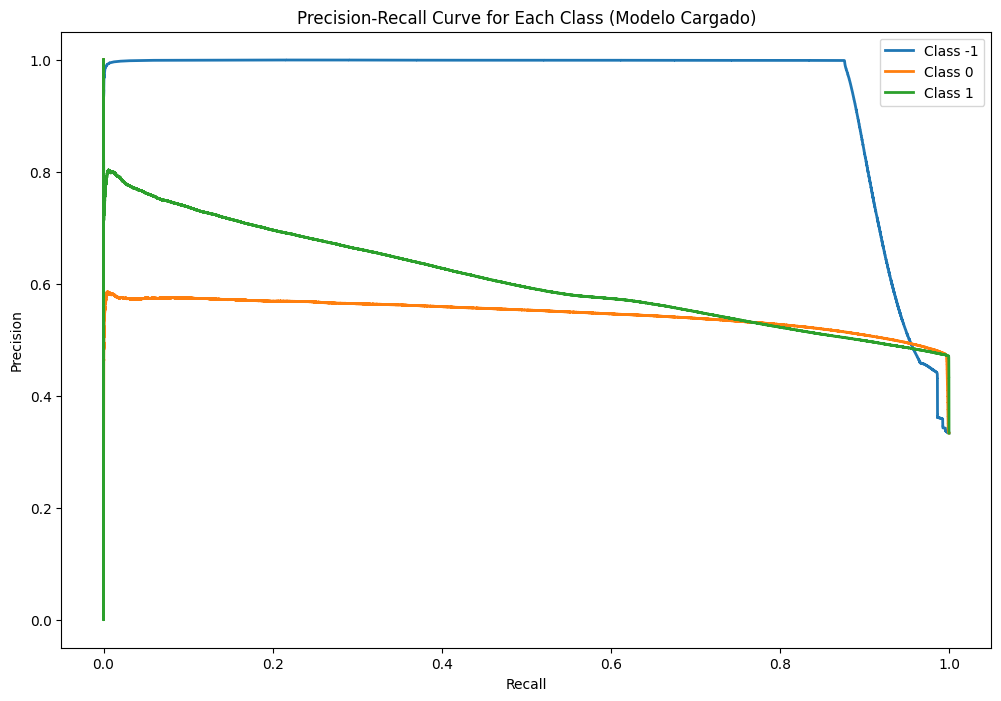

In [5]:
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import label_binarize

# Hacer predicciones con el modelo cargado
y_pred_cargado = model_cargado.predict(X_test)
y_pred_proba_cargado = model_cargado.predict_proba(X_test)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_cargado)

# Visualización de la Matriz de Confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['-1', '0', '1'], yticklabels=['-1', '0', '1'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Modelo Cargado)")
plt.show()

# Visualización de la curva ROC-AUC para cada clase
y_test_bin = label_binarize(y_test, classes=[-1, 0, 1])
n_classes = y_test_bin.shape[1]

plt.figure(figsize=(12, 8))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_proba_cargado[:, i])
    plt.plot(fpr, tpr, lw=2, label=f'Class {i-1} (area = {roc_auc_score(y_test_bin[:, i], y_pred_proba_cargado[:, i]):.2f})')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC Curve for Each Class (Modelo Cargado)")
plt.legend()
plt.show()


# Visualización de la curva precisión-recall para cada clase
plt.figure(figsize=(12, 8))
for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_pred_proba_cargado[:, i])
    plt.plot(recall, precision, lw=2, label=f'Class {i-1}')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for Each Class (Modelo Cargado)")
plt.legend()
plt.show()


In [6]:
import numpy as np
import pandas as pd

# Ejemplo de nuevos datos para hacer predicciones
# Crear un DataFrame de prueba con los mismos nombres de columna y tipos de datos
X_nuevos = pd.DataFrame({
    'user_id': [34176, 12345, 67890, 11121, 31415],      # ID de usuario, solo un ejemplo
    'age_range': [6.0, 3.0, 4.0, 5.0, 2.0],              # Intervalo de edad
    'gender': [0.0, 1.0, 0.0, 1.0, 0.0],                 # Género (suponiendo 0: masculino, 1: femenino)
    'merchant_id': [944, 122, 344, 599, 878],            # ID del comerciante
    'item_id': [408895, 123456, 789012, 345678, 901234], # ID del artículo
    'category_id': [1505, 1600, 1700, 1500, 1605],       # ID de la categoría
    'brand_id': [7370, 7470, 7570, 7670, 7770],          # ID de la marca
    'clicks': [1, 3, 5, 0, 2],                           # Número de clics
    'add_to_cart': [0, 1, 0, 2, 1],                      # Añadido al carrito
    'purchases': [0, 0, 1, 0, 0],                        # Compras realizadas
    'add_to_favorites': [0, 1, 0, 1, 0],                 # Añadido a favoritos
    'total_actions': [1, 5, 6, 3, 4],                    # Total de acciones
    'unique_item_count': [1, 1, 2, 1, 1]                 # Conteo de ítems únicos
})

# Escalar los nuevos datos utilizando el mismo escalador ajustado anteriormente
X_nuevos_scaled = scaler.transform(X_nuevos)

# Realizar la predicción de clases con el modelo entrenado
y_pred_nuevos = model.predict(X_nuevos_scaled)

# (Opcional) Obtener las probabilidades de predicción para cada clase
y_pred_proba_nuevos = model.predict_proba(X_nuevos_scaled)

# Mostrar los resultados
print("Clases predichas para los nuevos datos:", y_pred_nuevos)
print("Probabilidades para cada clase en los nuevos datos:\n", y_pred_proba_nuevos)


Clases predichas para los nuevos datos: [-1 -1  0 -1 -1]
Probabilidades para cada clase en los nuevos datos:
 [[9.43109823e-001 3.21618477e-002 2.47283293e-002]
 [9.95615635e-001 4.38436505e-003 2.97274925e-082]
 [1.85209558e-001 4.24546815e-001 3.90243627e-001]
 [9.99641416e-001 3.58583994e-004 3.01303791e-162]
 [5.94543305e-001 4.05456695e-001 4.15827368e-080]]


In [8]:
import joblib
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Suponiendo que ya tienes el modelo entrenado y el conjunto de prueba (X_test, y_test)
y_pred = model.predict(X_test)

# Calcular las métricas
metrics = {
    'accuracy': accuracy_score(y_test, y_pred),
    'confusion_matrix': confusion_matrix(y_test, y_pred),
    'classification_report': classification_report(y_test, y_pred, output_dict=True)  # Salida en formato dict para guardar fácilmente
}

# Guardar el modelo y las métricas en un diccionario
modelo_y_metricas = {
    'model': model,
    'metrics': metrics
}

# Guardar el diccionario en un archivo
joblib.dump(modelo_y_metricas, 'dashboardData/RegresionLogistica/modelo_logistico_con_metricas.pkl')


['dashboardData/RegresionLogistica/modelo_logistico_con_metricas.pkl']

In [10]:
# Cargar el modelo y las métricas desde el archivo
modelo_y_metricas_cargado = joblib.load('dashboardData/RegresionLogistica/modelo_logistico_con_metricas.pkl')

# Obtener el modelo y las métricas
model_cargado = modelo_y_metricas_cargado['model']
metrics_cargadas = modelo_y_metricas_cargado['metrics']

# Mostrar las métricas cargadas
print("Exactitud del modelo:", metrics_cargadas['accuracy'])
print("Matriz de confusión:\n", metrics_cargadas['confusion_matrix'])
print("Reporte de clasificación:\n", metrics_cargadas['classification_report'])


Exactitud del modelo: 0.6927443553374582
Matriz de confusión:
 [[1186692  127779   39412]
 [   1781  967377  383879]
 [   1811  692846  658586]]
Reporte de clasificación:
 {'-1': {'precision': 0.9969822328116651, 'recall': 0.8765100086196518, 'f1-score': 0.9328727241568655, 'support': 1353883.0}, '0': {'precision': 0.5410379854161237, 'recall': 0.7149671442835636, 'f1-score': 0.6159598782441097, 'support': 1353037.0}, '1': {'precision': 0.608743877538759, 'recall': 0.48667238626026516, 'f1-score': 0.5409064029698741, 'support': 1353243.0}, 'accuracy': 0.6927443553374582, 'macro avg': {'precision': 0.7155880319221826, 'recall': 0.6927165130544934, 'f1-score': 0.6965796684569497, 'support': 4060163.0}, 'weighted avg': {'precision': 0.7156412439725731, 'recall': 0.6927443553374582, 'f1-score': 0.6966210055245581, 'support': 4060163.0}}


In [14]:
import joblib
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, 
    roc_curve, roc_auc_score, log_loss
)
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import learning_curve

# Supón que tienes X_train, y_train, X_test, y_test disponibles

# Configuración del modelo de regresión logística con warm_start para permitir múltiples épocas
model = LogisticRegression(solver='saga', max_iter=1, warm_start=True)
loss_values = []
roc_auc_data = {}

# Número de épocas para capturar la curva de pérdida
num_epochs = 50

# Entrenar el modelo en varias épocas y calcular la curva de pérdida
for epoch in range(num_epochs):
    model.fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_test)
    
    # Calcular y almacenar el log loss en el conjunto de prueba completo para cada época
    loss = log_loss(y_test, y_pred_proba)
    loss_values.append(loss)

# Realizar predicciones en el conjunto de prueba para calcular las métricas
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)

# Calcular las métricas principales
metrics = {
    'accuracy': accuracy_score(y_test, y_pred),
    'confusion_matrix': confusion_matrix(y_test, y_pred),
    'classification_report': classification_report(y_test, y_pred, output_dict=True)
}

# Binarizar las etiquetas de prueba para calcular la curva ROC-AUC para cada clase
y_test_bin = label_binarize(y_test, classes=[-1, 0, 1])
n_classes = y_test_bin.shape[1]

# Calcular fpr, tpr y AUC para cada clase y almacenar en `roc_auc_data`
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    auc_score = roc_auc_score(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc_data[f'class_{i-1}'] = {
        'fpr': fpr,
        'tpr': tpr,
        'auc': auc_score
    }

# Calcular la curva de aprendizaje
train_sizes, train_scores, valid_scores = learning_curve(
    model, X_train, y_train, cv=5, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10)
)

# Almacenar los valores medios y desviaciones estándar de los puntajes de entrenamiento y validación
learning_curve_data = {
    'train_sizes': train_sizes.tolist(),
    'train_scores_mean': np.mean(train_scores, axis=1).tolist(),
    'train_scores_std': np.std(train_scores, axis=1).tolist(),
    'valid_scores_mean': np.mean(valid_scores, axis=1).tolist(),
    'valid_scores_std': np.std(valid_scores, axis=1).tolist()
}

# Almacenar el modelo, métricas y datos de las gráficas en un diccionario
modelo_y_metricas = {
    'model': model,
    'metrics': metrics,
    'roc_auc_data': roc_auc_data,
    'loss_values': loss_values,
    'learning_curve': learning_curve_data
}

# Guardar el diccionario en un archivo .pkl
joblib.dump(modelo_y_metricas, 'dashboardData/RegresionLogistica/modelo_logistico_con_metricas.pkl')


c:\Documentos\Semestre8\DataScience\Proyectos\Proyecto2DS\venv\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Documentos\Semestre8\DataScience\Proyectos\Proyecto2DS\venv\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Documentos\Semestre8\DataScience\Proyectos\Proyecto2DS\venv\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Documentos\Semestre8\DataScience\Proyectos\Proyecto2DS\venv\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Documentos\Semestre8\DataScience\Proyectos\Proyecto2DS\venv\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: T

['dashboardData/RegresionLogistica/modelo_logistico_con_metricas.pkl']

In [23]:
import pandas as pd
import numpy as np

# Define las columnas según las usadas en el entrenamiento y en la matriz de confusión
columnas = [
    'user_id', 'age_range', 'gender', 'merchant_id', 'item_id', 'category_id', 
    'brand_id', 'clicks', 'add_to_cart', 'purchases', 'add_to_favorites', 
    'total_actions', 'unique_item_count'
]

# Número de muestras para la predicción
num_samples = 100  

# Generar datos de muestra usando estadísticas de `X_train`
# Asegúrate de reemplazar `X_train_df` con el nombre real del DataFrame o `pd.DataFrame` que contiene `X_train` si lo tienes.
# Si `X_train` es un ndarray, convierte temporalmente en DataFrame solo para obtener estadísticas.
X_train_df = pd.DataFrame(X_train, columns=columnas)  # Convierte a DataFrame si `X_train` es un array

# Generar muestras utilizando la media y desviación estándar de `X_train`
muestra_datos = pd.DataFrame({
    col: np.random.normal(X_train_df[col].mean(), X_train_df[col].std(), num_samples) 
    for col in columnas
})

# Asegurarse de que las columnas enteras (como ID) tengan valores enteros
muestra_datos['user_id'] = muestra_datos['user_id'].astype(int)
muestra_datos['merchant_id'] = muestra_datos['merchant_id'].astype(int)
muestra_datos['item_id'] = muestra_datos['item_id'].astype(int)
muestra_datos['category_id'] = muestra_datos['category_id'].astype(int)
muestra_datos['brand_id'] = muestra_datos['brand_id'].astype(int)
muestra_datos['clicks'] = muestra_datos['clicks'].astype(int)
muestra_datos['add_to_cart'] = muestra_datos['add_to_cart'].astype(int)
muestra_datos['purchases'] = muestra_datos['purchases'].astype(int)
muestra_datos['add_to_favorites'] = muestra_datos['add_to_favorites'].astype(int)
muestra_datos['total_actions'] = muestra_datos['total_actions'].astype(int)
muestra_datos['unique_item_count'] = muestra_datos['unique_item_count'].astype(int)

# Guardar el conjunto de datos de muestra en un archivo CSV
muestra_datos.to_csv('dashboardData/RegresionLogistica/dataRegresionLogistica.csv', index=False)

print("Archivo 'dataRegresionLogistica.csv' generado exitosamente.")


Archivo 'dataRegresionLogistica.csv' generado exitosamente.


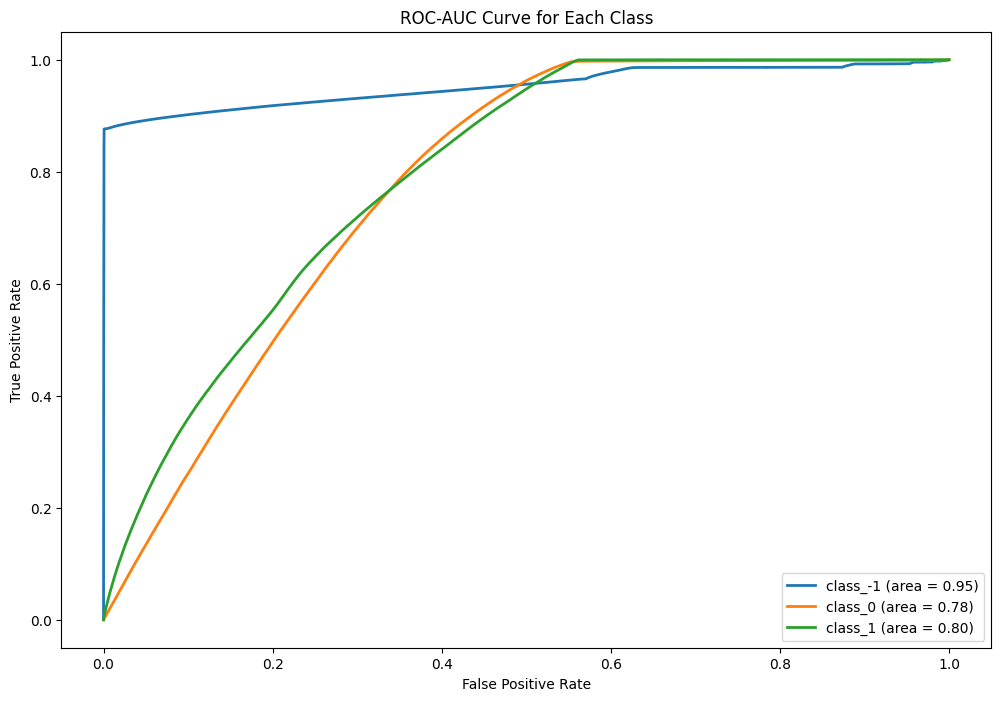

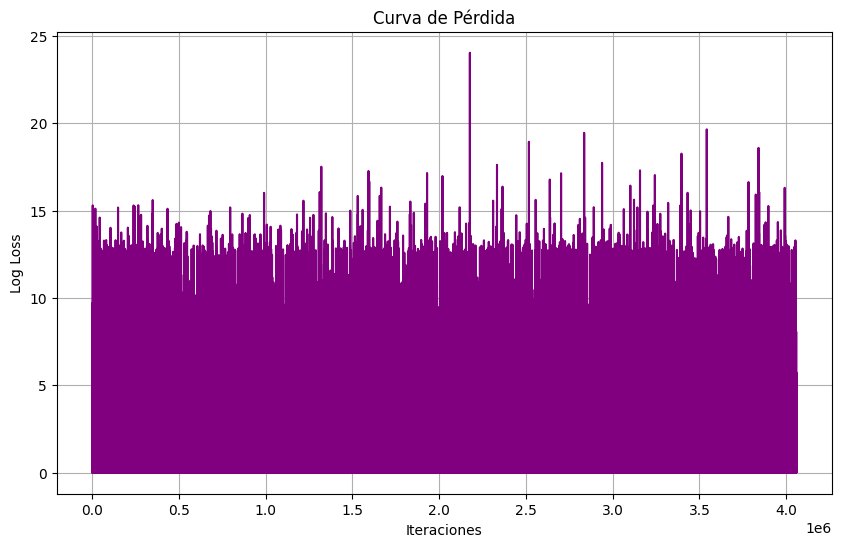

In [13]:
import joblib
import matplotlib.pyplot as plt

# Cargar el archivo
modelo_y_metricas_cargado = joblib.load('dashboardData/RegresionLogistica/modelo_logistico_con_metricas.pkl')

# Recrear la gráfica de la curva ROC-AUC
plt.figure(figsize=(12, 8))
roc_auc_data = modelo_y_metricas_cargado['roc_auc_data']
for class_label, data in roc_auc_data.items():
    plt.plot(data['fpr'], data['tpr'], lw=2, label=f'{class_label} (area = {data["auc"]:.2f})')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC Curve for Each Class")
plt.legend()
plt.show()

loss_values = modelo_y_metricas_cargado['loss_values']
plt.figure(figsize=(10, 6))
plt.plot(loss_values, color="purple")
plt.xlabel("Épocas" if 'epochs' in modelo_y_metricas_cargado else "Iteraciones")
plt.ylabel("Log Loss")
plt.title("Curva de Pérdida")
plt.grid(True)
plt.show()


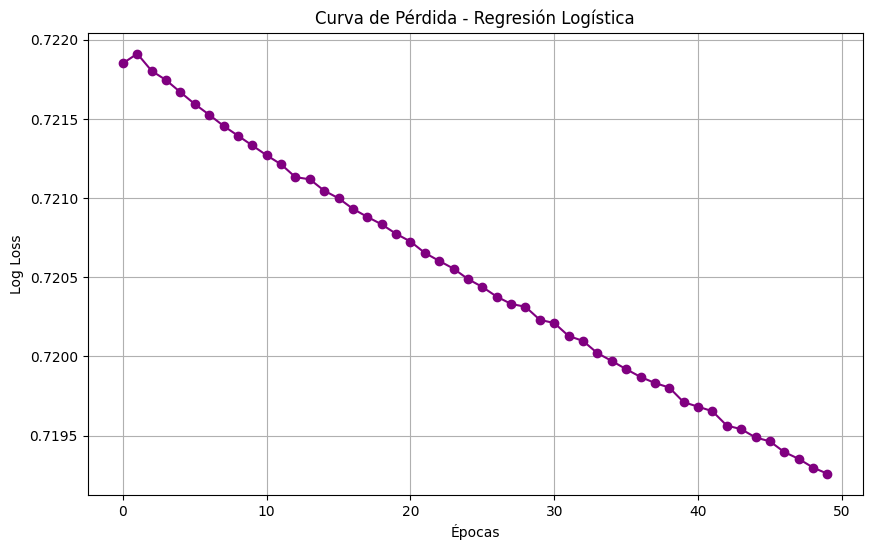

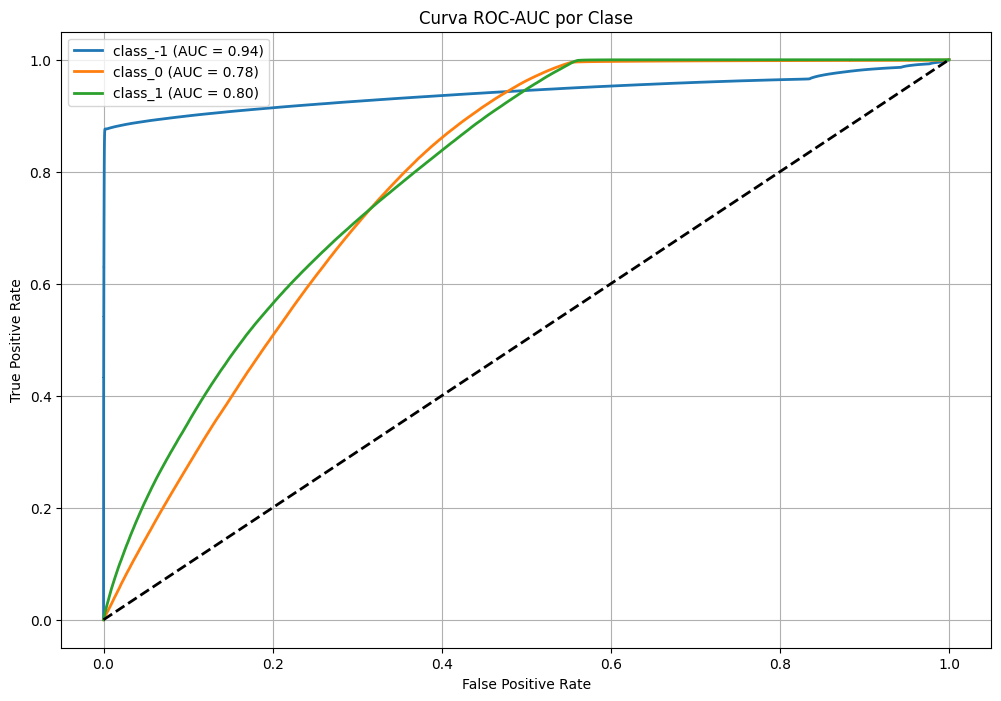

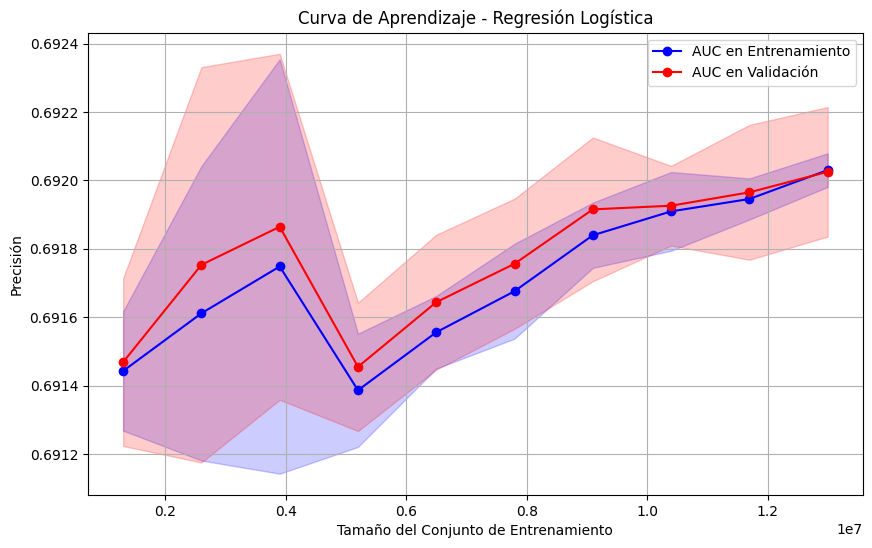

In [15]:
import joblib
import matplotlib.pyplot as plt
import numpy as np

# Cargar el archivo .pkl que contiene el modelo y las métricas
modelo_y_metricas = joblib.load('dashboardData/RegresionLogistica/modelo_logistico_con_metricas.pkl')

# Extraer los datos necesarios de `modelo_y_metricas`
loss_values = modelo_y_metricas['loss_values']
roc_auc_data = modelo_y_metricas['roc_auc_data']
learning_curve_data = modelo_y_metricas['learning_curve']

# ==========================
# Graficar la Curva de Pérdida
# ==========================
plt.figure(figsize=(10, 6))
plt.plot(loss_values, color="purple", marker="o", linestyle="-")
plt.xlabel("Épocas")
plt.ylabel("Log Loss")
plt.title("Curva de Pérdida - Regresión Logística")
plt.grid(True)
plt.show()

# ==========================
# Graficar la Curva ROC-AUC
# ==========================
plt.figure(figsize=(12, 8))
for class_label, data in roc_auc_data.items():
    fpr, tpr, auc_score = data['fpr'], data['tpr'], data['auc']
    plt.plot(fpr, tpr, lw=2, label=f'{class_label} (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Línea diagonal de referencia
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC-AUC por Clase")
plt.legend()
plt.grid(True)
plt.show()

# ==========================
# Graficar la Curva de Aprendizaje
# ==========================
train_sizes = learning_curve_data['train_sizes']
train_scores_mean = learning_curve_data['train_scores_mean']
train_scores_std = learning_curve_data['train_scores_std']
valid_scores_mean = learning_curve_data['valid_scores_mean']
valid_scores_std = learning_curve_data['valid_scores_std']

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', label="AUC en Entrenamiento", color="blue")
plt.plot(train_sizes, valid_scores_mean, 'o-', label="AUC en Validación", color="red")
plt.fill_between(train_sizes, 
                 np.array(train_scores_mean) - np.array(train_scores_std),
                 np.array(train_scores_mean) + np.array(train_scores_std),
                 alpha=0.2, color="blue")
plt.fill_between(train_sizes, 
                 np.array(valid_scores_mean) - np.array(valid_scores_std),
                 np.array(valid_scores_mean) + np.array(valid_scores_std),
                 alpha=0.2, color="red")
plt.xlabel("Tamaño del Conjunto de Entrenamiento")
plt.ylabel("Precisión")
plt.title("Curva de Aprendizaje - Regresión Logística")
plt.legend(loc="best")
plt.grid(True)
plt.show()
